# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
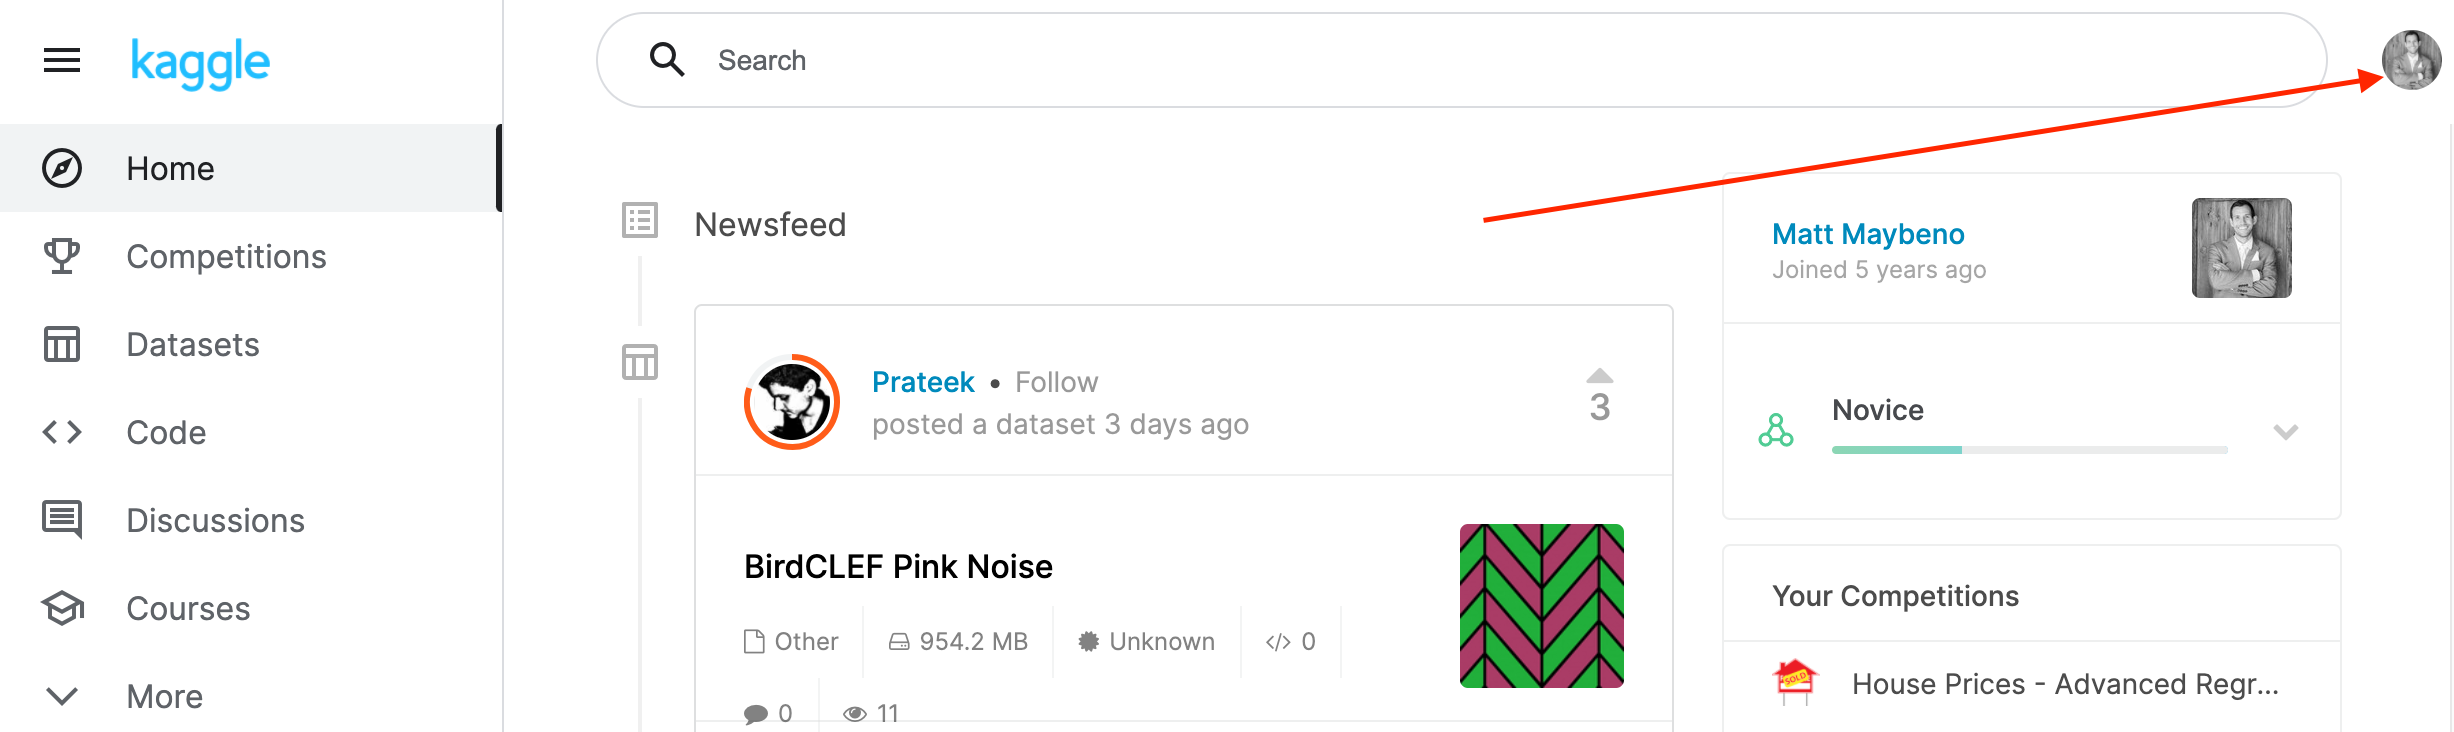
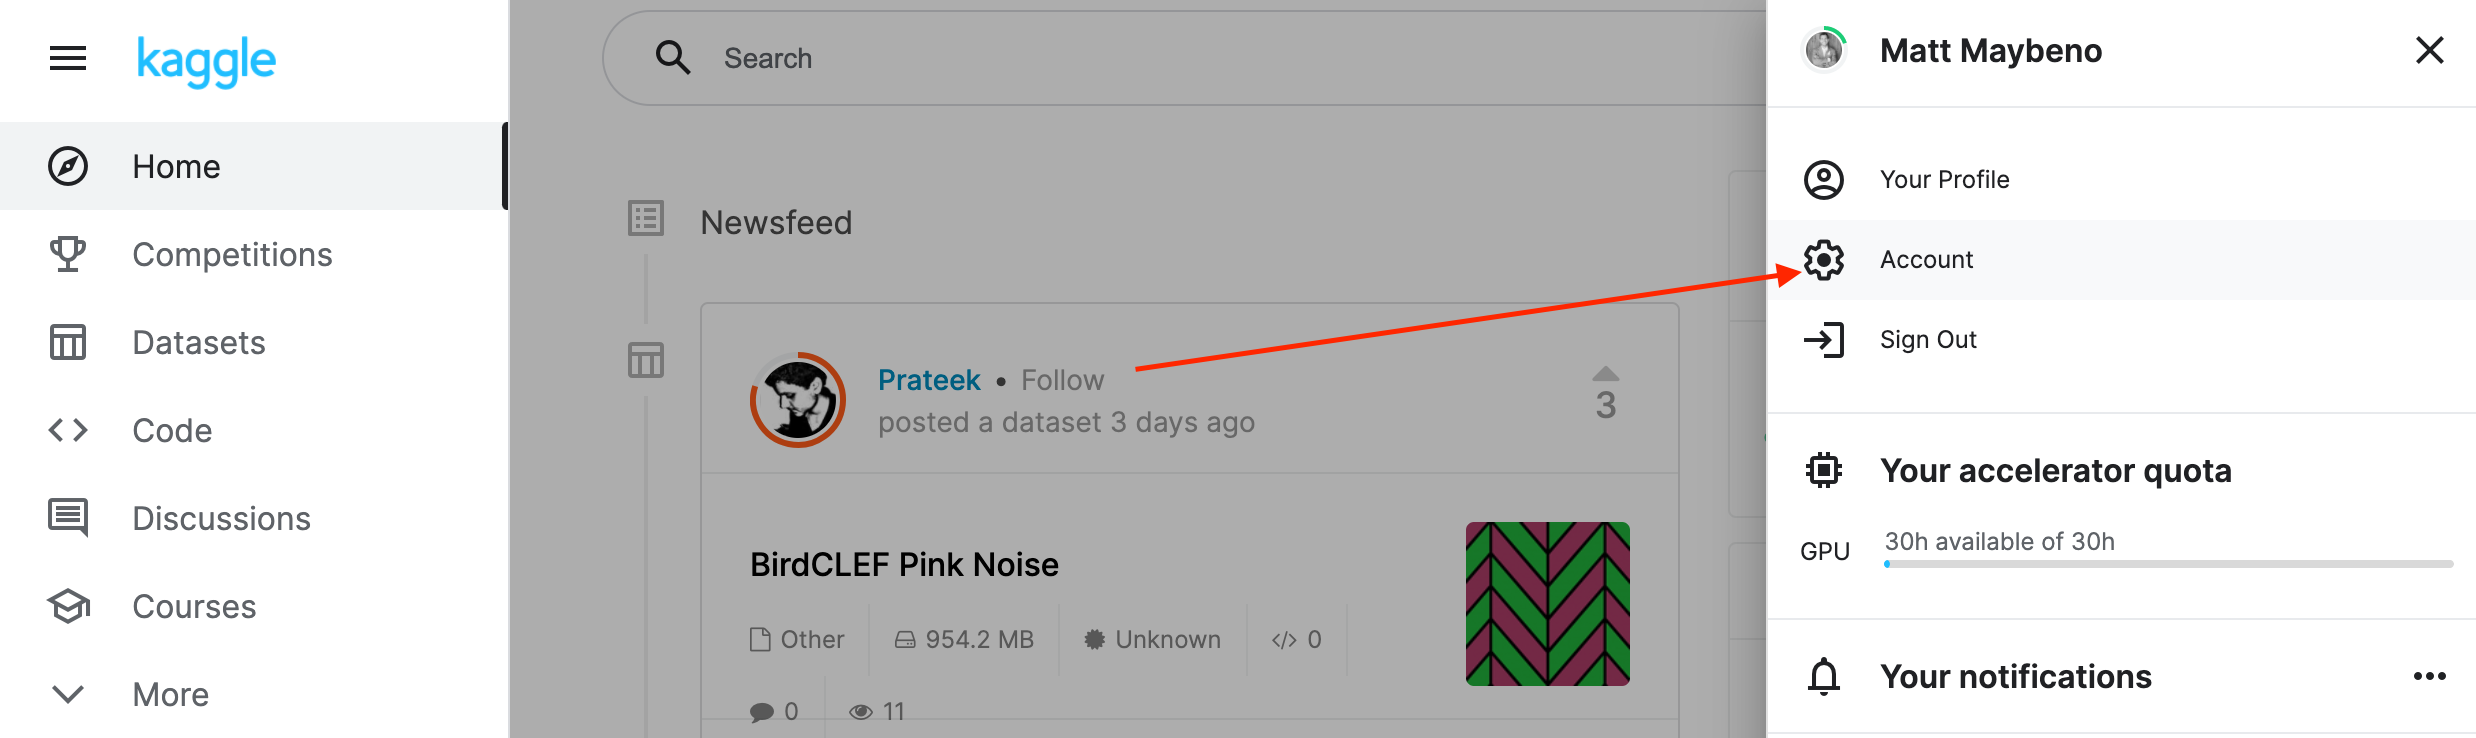
2. Scroll down to API and click Create New API Token.
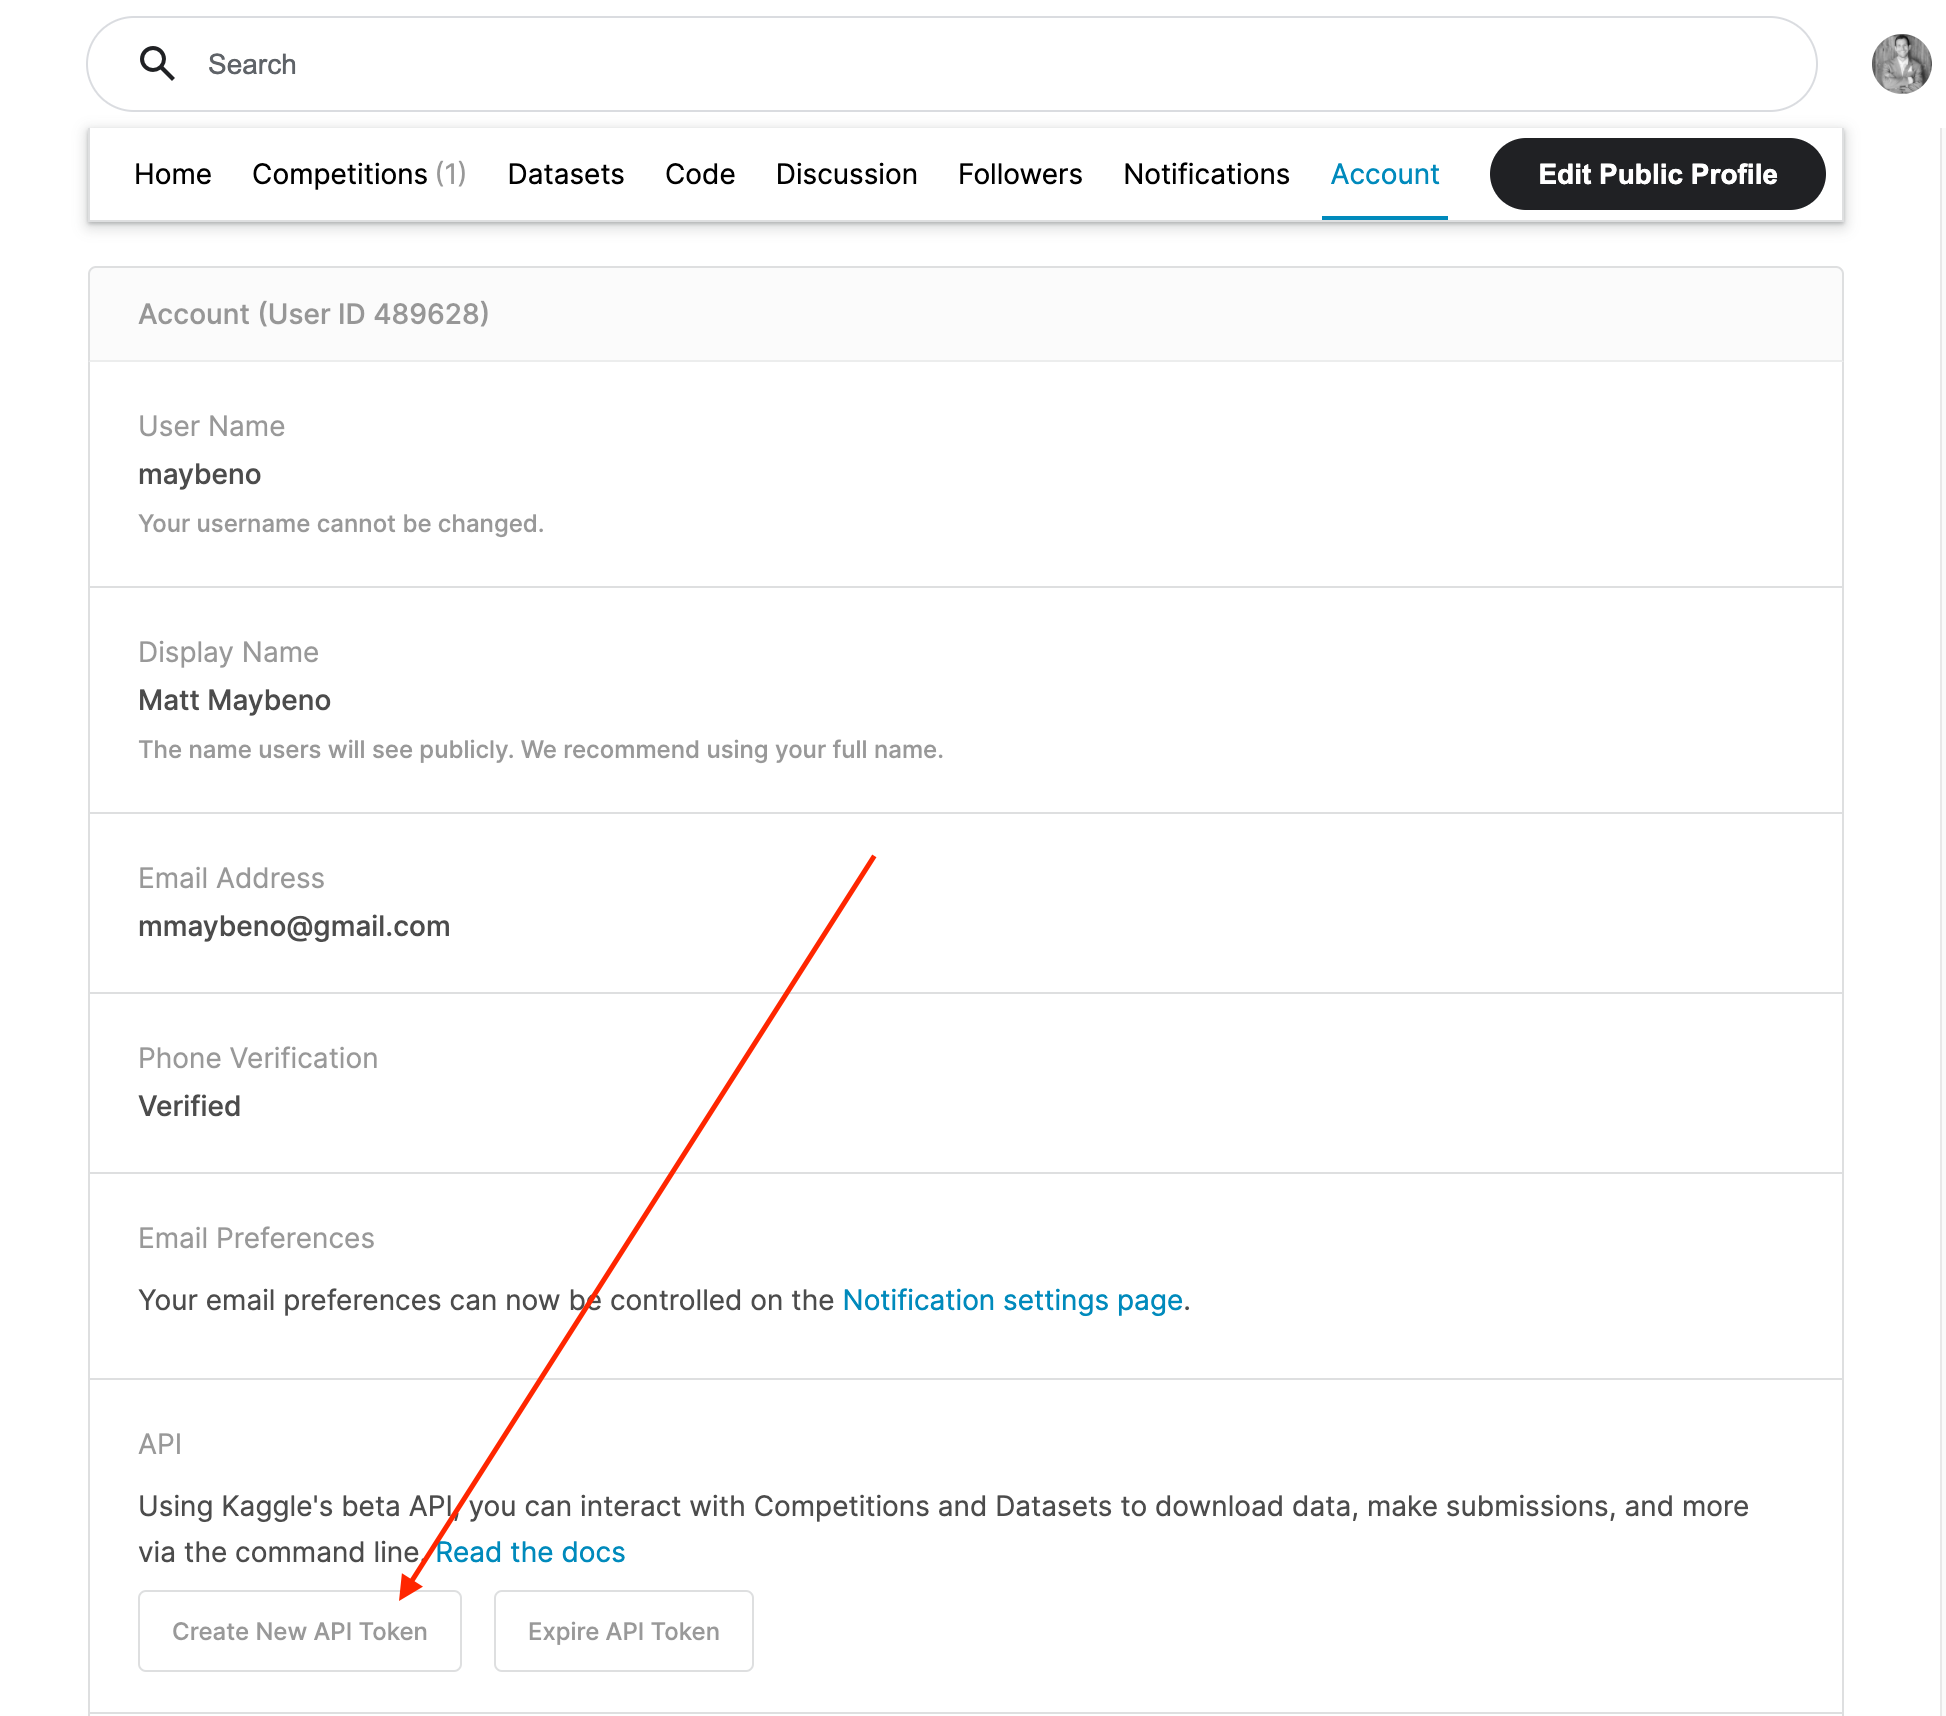
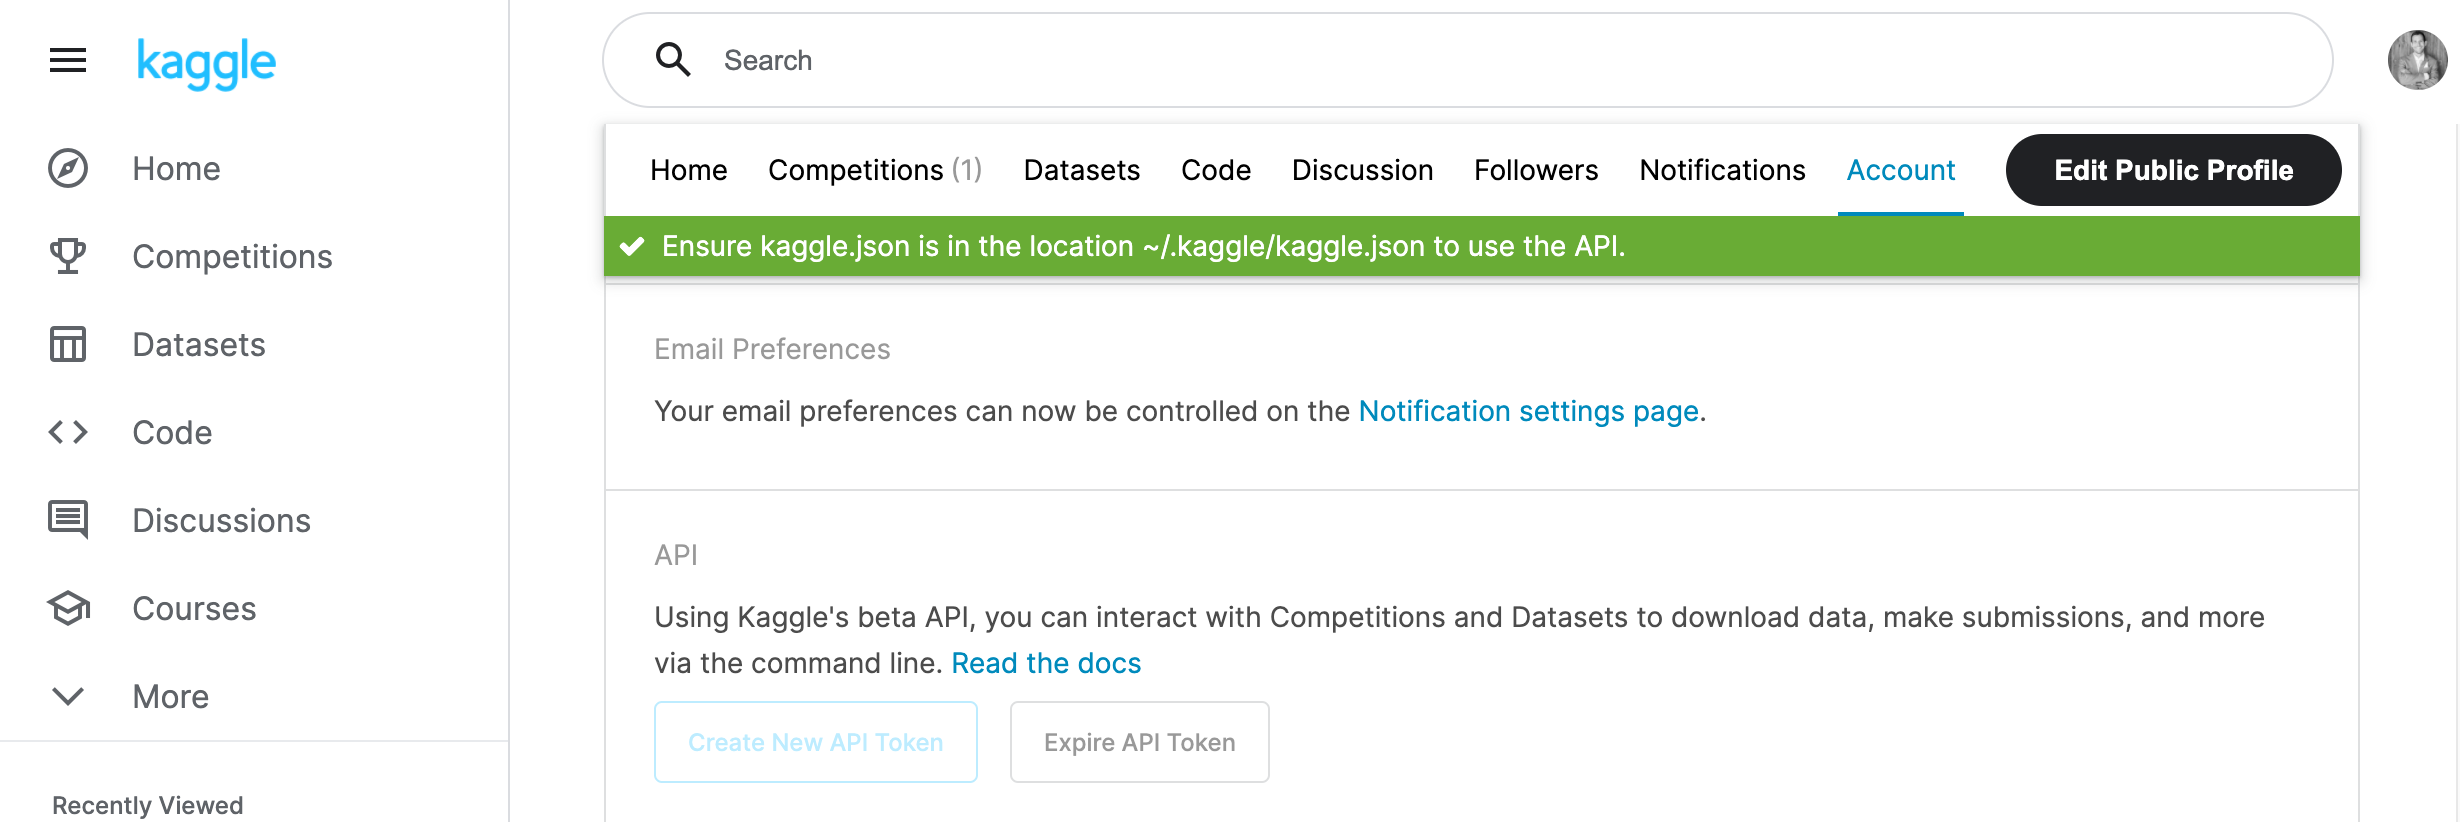
3. Open up `kaggle.json` and use the username and key.
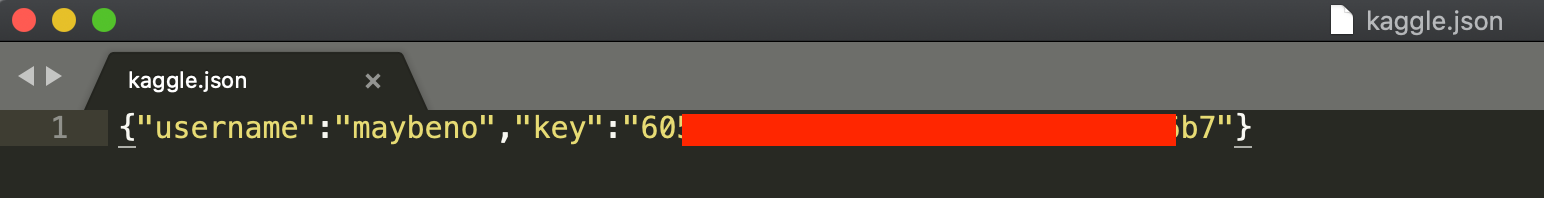

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.7/289.7 kB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install -U kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)


### Download and explore dataset

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('./data/train.csv', parse_dates = ['datetime'])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('./data/test.csv', parse_dates = ['datetime'])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [9]:
# Same thing as train and test dataset
submission = pd.read_csv('./data/sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [16]:
ignored_columns = ['casual', 'registered']

In [70]:
predictor = TabularPredictor(
    label='count', 
    eval_metric = 'root_mean_squared_error', 
    path = 'AutogluonModels/train_0', 
    learner_kwargs= {'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=600,
    presets='best_quality'
    )

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/train_0/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual

### Review AutoGluon's training run with ranking of models that did the best.

In [71]:
summary = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.160707      21.169362  558.441472                0.000884           0.305267            3       True         15
1          CatBoost_BAG_L2  -30.357623      19.582405  490.632354                0.099068          88.806633            2       True         13
2          LightGBM_BAG_L2  -30.684098      19.835106  426.397590                0.351769          24.571869            2       True         11
3        LightGBMXT_BAG_L2  -31.076789      20.440741  430.592088                0.957404          28.766367            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.733865      19.881556  405.761741                0.398219           3.936020            2       True         14
5   RandomForestMSE_BAG_L2  -31.784974      19.760237  415.991337         

<AxesSubplot:ylabel='model'>

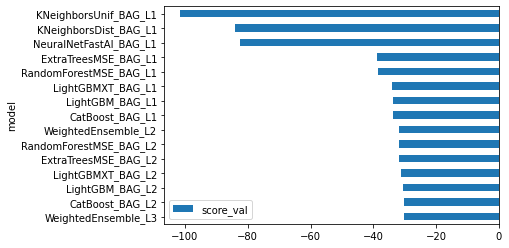

In [72]:
predictor.leaderboard(silent=True).plot(kind="barh", x="model", y="score_val")

### Create predictions from test dataset

In [75]:
predictions = predictor.predict(test).to_frame()

In [58]:
predictions.head()

count
0  23.745392
1  41.830887
2  45.173424
3  47.954044
4  50.830311

In [59]:
test.join(predictions)[["datetime", "count"]]

datetime       count
0    2011-01-20 00:00:00   23.745392
1    2011-01-20 01:00:00   41.830887
2    2011-01-20 02:00:00   45.173424
3    2011-01-20 03:00:00   47.954044
4    2011-01-20 04:00:00   50.830311
...                  ...         ...
6488 2012-12-31 19:00:00  161.012787
6489 2012-12-31 20:00:00  161.054199
6490 2012-12-31 21:00:00  153.429443
6491 2012-12-31 22:00:00  150.891861
6492 2012-12-31 23:00:00  149.414185

[6493 rows x 2 columns]

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [60]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count
count  6493.000000
mean    100.855415
std      90.165398
min       2.947044
25%      20.590580
50%      63.036968
75%     169.972000
max     362.804230

In [63]:
# How many negative values do we have?
predictions.info()
# negative_count = (predictions < 0).sum()
# negative_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   6493 non-null   float32
dtypes: float32(1)
memory usage: 25.5 KB


In [ ]:
# Set them to zero
predictions.clip(lower=0)
predictions.head()

### Set predictions to submission dataframe, save, and submit

In [76]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 357kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [86]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 8

fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-05 22:58:23  new features with hyperparameters2  complete  0.47289      0.47289       
submission_new_hpo.csv       2023-01-05 22:49:18  new features with hyperparameters   complete  0.47289      0.47289       
submission_new_hpo2.csv      2023-01-05 22:44:29  new features with hyperparameters   complete  0.79380      0.79380       
submission_new_hpo2.csv      2023-01-05 22:40:48  new features with hyperparameters   error                                
submission_new_features.csv  2023-01-04 19:08:08  new features                        complete  0.71316      0.71316       
submission.csv               2023-01-03 23:41:09  first raw submission                complete  1.80206      1.80206       


#### Initial score of `1.80206`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

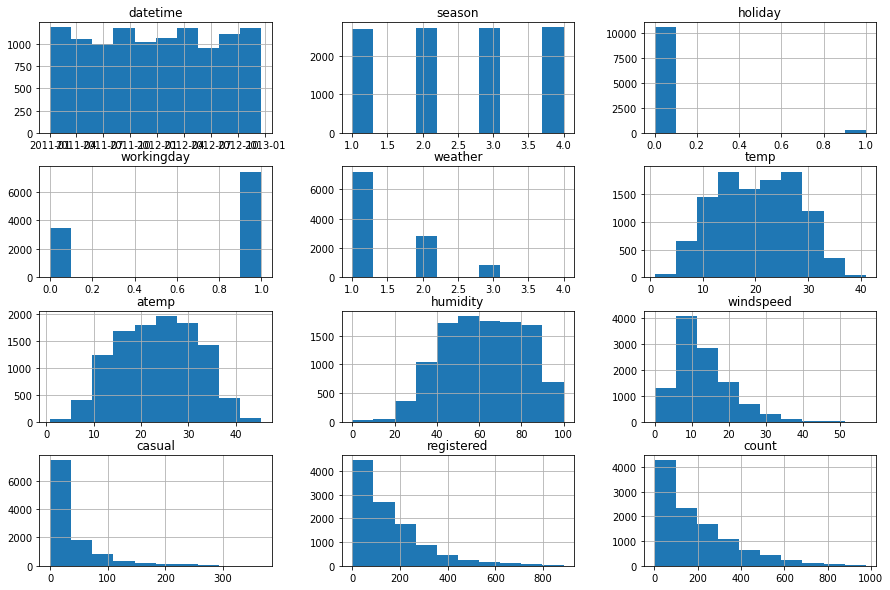

In [17]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis 
train.hist(figsize=(15,10))

In [13]:
corr = train.corr()
corr

season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610  -0.147121  0.096758    0.164011  0.163439  
holiday     0.001929   0.008409  0.043799   -0.020956 -0.005393  
workingday -0.010880   0.013373 -0.319111    0.119460  0.011594  
weather     0.406244   0.007261 -0.135918   -0.109340 -0.128655  
temp       -0.064949  -0.017852  0.467097    0.318571  0.394454  
atemp      -0.043536  -0.057473  0.462067    0.314635  0.389784  
humidity    1.000000  -0.318607 -0.348187   -0.265458 -0.317371  
windspeed  -0.318607   1.000000  0.092276    0.091052  0.101369  
casual     -0.348187   0.092276  1.000000    0.497250  0.690414  
registered -0.265458   0.091052  0.497250    1.000000  0.970948  
count      -0.317371   0.101369  0.690414    0.970948  1.000000

<AxesSubplot:>

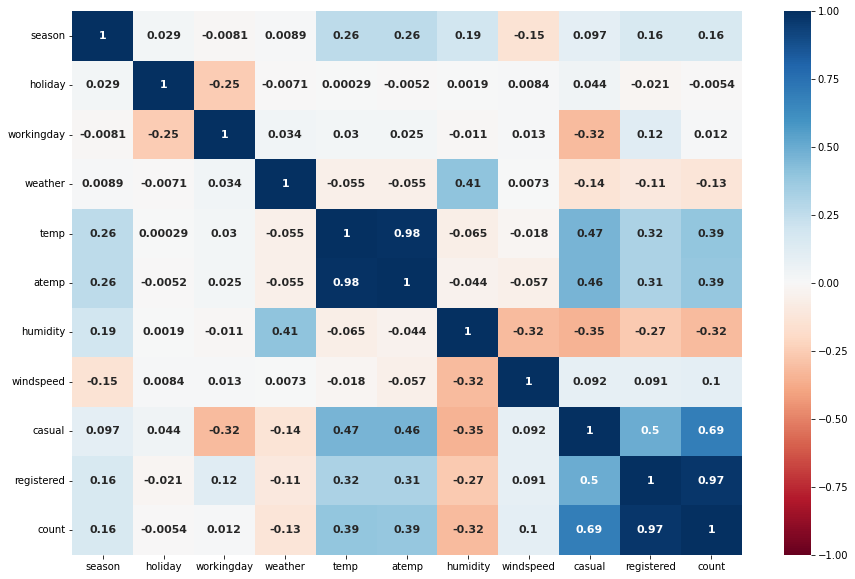

In [15]:
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr,  cmap='RdBu', vmin=-1, vmax=1, annot=True,
           annot_kws={'fontsize':11, 'fontweight':'bold'})

In [34]:
# create a new feature train data

train['Month']=  pd.to_datetime(train['datetime']).dt.month
train['Day'] = pd.to_datetime(train['datetime']).dt.day_name()
train['Hour'] = pd.to_datetime(train['datetime']).dt.hour

In [35]:
train_data = pd.get_dummies(train, columns = ['Day'])

In [36]:
# create a new feature test data

test['Month']=  pd.to_datetime(test['datetime']).dt.month
test['Day'] = pd.to_datetime(test['datetime']).dt.day_name()
test['Hour'] = pd.to_datetime(test['datetime']).dt.hour


In [37]:
test_data = pd.get_dummies(test, columns = ['Day'])

In [38]:
train_data

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  ...  count  Month  Hour  \
0      14.395        81     0.0000       3  ...     16      1     0   
1      13.635        80     0.0000       8  ...     40      1     1   
2      13.635        80     0.0000       5  ...     32      1     2   
3      14.395        75     0.0000       3  ...     13      1     3   
4      14.395        75     0.0000       0  ...      1      1     4   
...       ...       ...        ...     ...  ...    ...    ...   ...   
10881  19.695        50    26.0027       7  ...    336     12    19   
10882  17.425        57    15.0013      10  ...    241     12    20   
10883  15.910        61    15.0013       4  ...    168     12    21   
10884  17.425        61     6.0032      12  ...    129     12    22   
10885  16.665        66     8.9981       4  ...     88     12    23   

       Day_Friday  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0               0           0             1           0             0   
1               0           0             1           0             0   
2               0           0             1           0             0   
3               0           0             1           0             0   
4               0           0             1           0             0   
...           ...         ...           ...         ...           ...   
10881           0           0             0           0             0   
10882           0           0             0           0             0   
10883           0           0             0           0             0   
10884           0           0             0           0             0   
10885           0           0             0           0             0   

       Day_Tuesday  Day_Wednesday  
0                0              0  
1                0              0  
2                0              0  
3                0              0  
4                0              0  
...            ...            ...  
10881            0              1  
10882            0              1  
10883            0              1  
10884            0              1  
10885            0              1  

[10886 rows x 21 columns]

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [39]:
train_data["season"] = train_data["season"].astype("category")
train_data["weather"] = train_data["weather"].astype("category")
test_data["season"] = test_data["season"].astype("category")
test_data["weather"] = test_data["weather"].astype("category")

In [40]:
# View are new feature
train_data.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  ...  count  Month  Hour  Day_Friday  \
0        81        0.0       3  ...     16      1     0           0   
1        80        0.0       8  ...     40      1     1           0   
2        80        0.0       5  ...     32      1     2           0   
3        75        0.0       3  ...     13      1     3           0   
4        75        0.0       0  ...      1      1     4           0   

   Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  Day_Tuesday  \
0           0             1           0             0            0   
1           0             1           0             0            0   
2           0             1           0             0            0   
3           0             1           0             0            0   
4           0             1           0             0            0   

   Day_Wednesday  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 21 columns]

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Hour'}>],
       [<AxesSubplot:title={'center':'Day_Friday'}>,
        <AxesSubplot:title={'center':'Day_Monday'}>,
        <AxesSubplot:title={'center':'Day_Saturday'}>,
        <AxesSubplot:title={'center':'Day_Sunday'}>],
       [<AxesSubplot:title={'center':'Day_Thursday'}>,
        <AxesSubplot:title={'center':'Day_Tuesday'}>,
        <AxesSubplot:title={'center':'Day_Wednesday'}>, <AxesSubplot:>]],
  

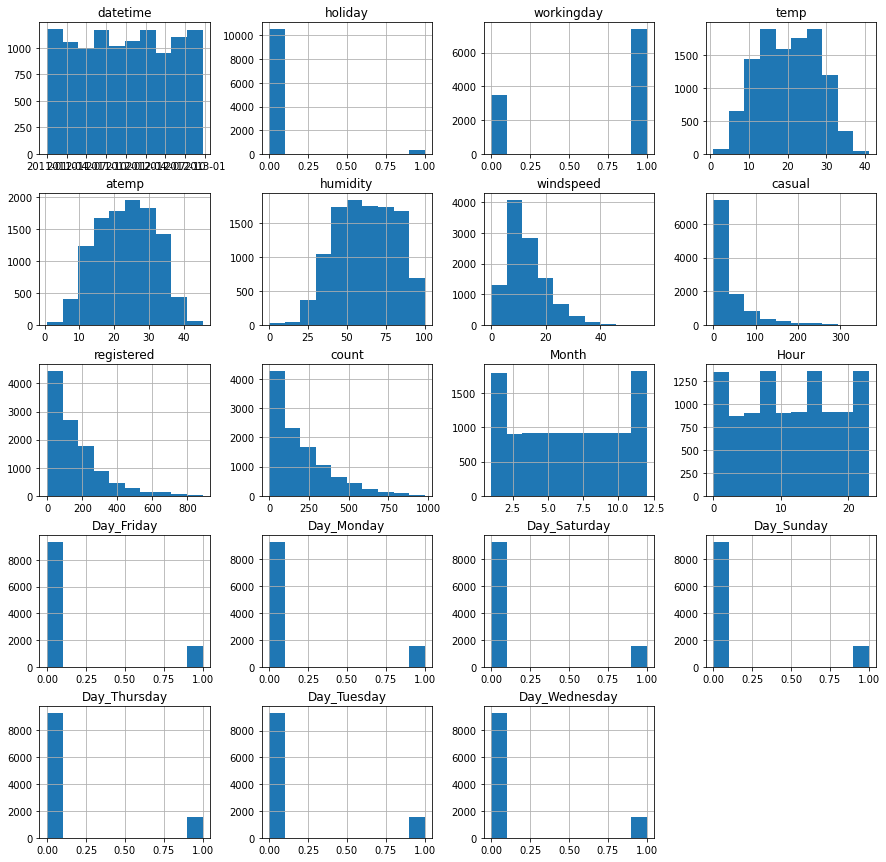

In [36]:
# View histogram of all features again now with the hour feature
train_data.hist(figsize=(15,15))

## Step 5: Rerun the model with the same settings as before, just with more features

In [21]:
predictor_new_features = TabularPredictor(
    label='count', 
    eval_metric = 'root_mean_squared_error', 
    path = 'AutogluonModels/train_new_feature', 
    learner_kwargs= {'ignored_columns': ignored_columns}
).fit(
    train_data=train_data,
    time_limit=600,
    presets='best_quality'
    )

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/train_new_feature/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 20
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns

<AxesSubplot:ylabel='model'>

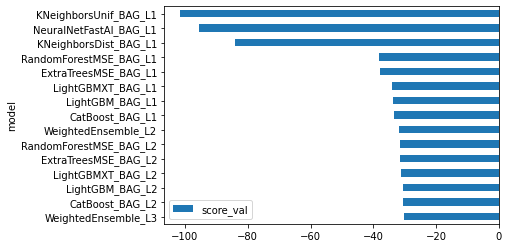

In [22]:
predictor_new_features.leaderboard(silent=True).plot(kind="barh", x="model", y="score_val")

In [25]:
summary = predictor_new_features.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.231664      15.028273  549.659988                0.001015           0.323084            3       True         15
1          CatBoost_BAG_L2  -30.417046      13.431463  471.476704                0.106957          83.252877            2       True         13
2          LightGBM_BAG_L2  -30.674154      13.603639  410.361189                0.279134          22.137362            2       True         11
3        LightGBMXT_BAG_L2  -31.316468      13.987501  413.030656                0.662996          24.806829            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.564747      13.967277  398.295393                0.642771          10.071566            2       True         14
5   RandomForestMSE_BAG_L2  -31.586674      13.978172  419.139835         

In [28]:
summary.keys()

dict_keys(['model_types', 'model_performance', 'model_best', 'model_paths', 'model_fit_times', 'model_pred_times', 'num_bag_folds', 'max_stack_level', 'model_hyperparams', 'leaderboard'])

In [74]:
summary['model_best']

'WeightedEnsemble_L3'

In [32]:
summary['model_types']

{'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
 'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
 'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
 'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
 'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
 'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
 'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
 'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
 'WeightedEnsemble_L2': 'WeightedEnsembleModel',
 'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
 'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
 'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
 'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
 'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
 'WeightedEnsemble_L3': 'WeightedEnsembleModel'}

In [40]:
summary['model_hyperparams']['WeightedEnsemble_L3']

{'use_orig_features': False,
 'max_base_models': 25,
 'max_base_models_per_type': 5,
 'save_bag_folds': True}

In [73]:
summary['model_performance']['WeightedEnsemble_L3']

-30.16070702031121

In [43]:
predictions_new_features = predictor_new_features.predict(test_data).to_frame()

In [45]:
test_data.join(predictions_new_features)[["datetime", "count"]]

datetime       count
0    2011-01-20 00:00:00   16.983265
1    2011-01-20 01:00:00   11.353883
2    2011-01-20 02:00:00   10.860777
3    2011-01-20 03:00:00    9.054020
4    2011-01-20 04:00:00    7.520559
...                  ...         ...
6488 2012-12-31 19:00:00  296.126221
6489 2012-12-31 20:00:00  211.099442
6490 2012-12-31 21:00:00  153.173691
6491 2012-12-31 22:00:00  112.595642
6492 2012-12-31 23:00:00   72.684250

[6493 rows x 2 columns]

In [47]:
# Remember to set all negative values to zero
predictions_new_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   6493 non-null   float32
dtypes: float32(1)
memory usage: 25.5 KB


In [56]:
# Same submitting predictions
submission["count"] = predictions_new_features
submission.to_csv("submission_new_features.csv", index=False)

In [59]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 327kB/s]
Successfully submitted to Bike Sharing Demand

In [60]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-04 19:08:08  new features          complete  0.71316      0.71316       
submission.csv               2023-01-03 23:41:09  first raw submission  complete  1.80206      1.80206       


#### New Score of ` 0.71316 `

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [17]:
# Change AutoGluon higher level parametrs - 1st try
predictor_new_hpo = TabularPredictor(  
    label='count', 
    eval_metric = 'root_mean_squared_error', 
    path = 'AutogluonModels/train_new_hpo', 
    learner_kwargs= {'ignored_columns': ignored_columns}
).fit(
    train_data=train_data,
    time_limit=900,
    presets='good_quality'
    )

Presets specified: ['good_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/train_new_hpo/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 20
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['

In [18]:
predictor_new_hpo.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                          model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3 -31.888814      16.994981  753.434120                0.000992           0.466967            3      False         16
1           WeightedEnsemble_L2 -31.929342      14.798496  500.654603                0.000943           0.389261            2      False          7
2          ExtraTreesMSE_BAG_L2 -32.133187      16.279872  588.467128                0.470543           6.672203            2      False         12
3               CatBoost_BAG_L2 -32.181704      15.903455  631.300192                0.094126          49.505267            2      False         11
4               LightGBM_BAG_L2 -32.422225      15.943622  601.082128                0.134292          19.287203            2      False          9
5        NeuralNetFastAI_BAG_L2 -32.645468      16

{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L1_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1_FULL': 'StackerEnsembleModel_LGB',
  'Random

In [55]:
predictions_new_hpo = predictor_new_hpo.predict(test_data).to_frame()

In [56]:
# Same submitting predictions
submission["count"] = predictions_new_hpo
submission.to_csv("submission_new_hpo.csv", index=False)

In [41]:
# Change AutoGluon higher level parametrs - 2nd try
predictor_new_hpo2 = TabularPredictor(  
    label='count', 
    eval_metric = 'root_mean_squared_error', 
    path = 'AutogluonModels/train_new_hpo2', 
    learner_kwargs= {'ignored_columns': ignored_columns}
).fit(
    train_data=train_data,
    time_limit=1200,
    presets='high_quality',
    auto_stack=True
    )

Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/train_new_hpo2/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 20
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: 

In [42]:
predictor_new_hpo2.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                          model   score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3  -29.873423      15.914232  1096.345624                0.001141           0.523460            3      False         19
1        NeuralNetFastAI_BAG_L2  -30.382332      15.335357   894.994891                0.539029         103.064752            2      False         16
2               CatBoost_BAG_L2  -30.510268      14.930145   938.807997                0.133818         146.877858            2      False         14
3               LightGBM_BAG_L2  -30.753671      15.026581   816.132448                0.230253          24.202308            2      False         12
4                XGBoost_BAG_L2  -30.955679      15.009991   821.677246                0.213663          29.747107            2      False         17
5             LightGBMXT_BAG_L2  -31.3

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'Weig

In [23]:
predictor_new_hpo2.predict(test_data).to_frame()

count
0      15.600881
1      11.066454
2      10.370525
3       8.719505
4       7.531137
...          ...
6488  298.437866
6489  215.501251
6490  153.237061
6491  113.880997
6492   73.642632

[6493 rows x 1 columns]

In [25]:
predictions_new_hpo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   6493 non-null   float32
dtypes: float32(1)
memory usage: 25.5 KB


In [26]:
# Change hyperparamets of the actual ML model - only to see how the model behaves during the training 
hyperparameter_tune_kwargs = { 
    'num_trials': 5,
    'scheduler' : 'local',
    'searcher': 'auto',
}

gbm_options = { 
    'num_boost_round': 500, 
     'extra_trees': True
}
hyperparameters = {  
                   'GBM': gbm_options,
                  }  
predictor_new_hpo3 = TabularPredictor(  
    label='count', 
    eval_metric = 'root_mean_squared_error', 
    path = 'AutogluonModels/train_new_hpo3', 
    learner_kwargs= {'ignored_columns': ignored_columns}
).fit(
    train_data=train_data,
    time_limit=900,
     presets='high_quality',
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
    )

Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/train_new_hpo3/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 20
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: [

In [28]:
predictor_new_hpo3.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       LightGBM_BAG_L1/T5 -38.641329       0.000114  25.179853                0.000114          25.179853            1      False          5
1       LightGBM_BAG_L1/T2 -41.006964       0.000131  27.022008                0.000131          27.022008            1      False          2
2       LightGBM_BAG_L1/T1 -41.352044       0.000113  25.179128                0.000113          25.179128            1      False          1
3       LightGBM_BAG_L1/T3 -43.140264       0.000443  25.203482                0.000443          25.203482            1      False          3
4       LightGBM_BAG_L1/T4 -94.105754       0.000080  26.526206                0.000080          26.526206            1      False          4
5  LightGBM_BAG_L1/T5_FULL        NaN            NaN   1.042886                     Na

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5_FULL': 'StackerEnsembleModel_LGB'},
 'model_performance': {'LightGBM_BAG_L1/T1': -41.35204394466302,
  'LightGBM_BAG_L1/T2': -41.00696442399675,
  'LightGBM_BAG_L1/T3': -43.14026401720962,
  'LightGBM_BAG_L1/T4': -94.10575382390007,
  'LightGBM_BAG_L1/T5': -38.64132898443894,
  'LightGBM_BAG_L1/T1_FULL': None,
  'LightGBM_BAG_L1/T2_FULL': None,
  'LightGBM_BAG_L1/T3_FULL': None,
  'LightGBM_BAG_L1/T4_FULL': None,
  'LightGBM_BAG_L1/T5_FULL': None},
 'model_best': 'LightG

In [49]:
predictions_new_hpo2 = predictor_new_hpo2.predict(test_data).to_frame()

In [51]:
predictions_new_hpo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   6493 non-null   float32
dtypes: float32(1)
memory usage: 25.5 KB


In [52]:
# Same submitting predictions
submission["count"] = predictions_new_hpo2
submission.to_csv("submission_new_hpo2.csv", index=False)

In [59]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 398kB/s]
Successfully submitted to Bike Sharing Demand

In [82]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 8


fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-05 22:58:23  new features with hyperparameters2  complete  0.47289      0.47289       
submission_new_hpo.csv       2023-01-05 22:49:18  new features with hyperparameters   complete  0.47289      0.47289       
submission_new_hpo2.csv      2023-01-05 22:44:29  new features with hyperparameters   complete  0.79380      0.79380       
submission_new_hpo2.csv      2023-01-05 22:40:48  new features with hyperparameters   error                                
submission_new_features.csv  2023-01-04 19:08:08  new features                        complete  0.71316      0.71316       
submission.csv               2023-01-03 23:41:09  first raw submission                complete  1.80206      1.80206       


#### New Score of `0.47289` 

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

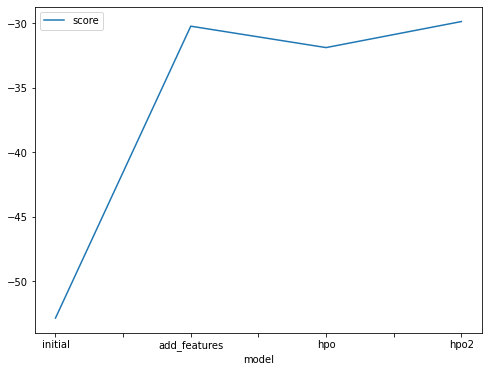

In [61]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo", "hpo2"],
        "score": [-52.832300, -30.231664, -31.888814, -29.873423 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

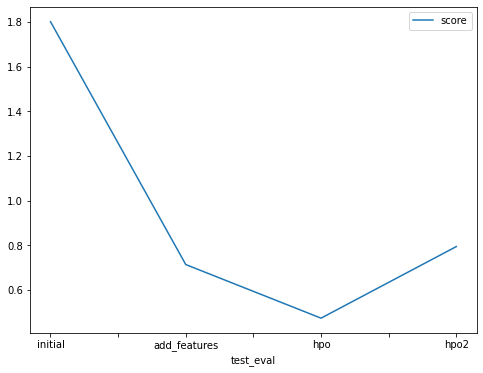

In [62]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "hpo2"],
        "score": [1.80206, 0.71316, 0.47289, 0.79380]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [68]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo", "hpo2"],
    "hpo1": [ "time_limit=600", "time_limit=600", "time_limit=900", "time_limit=1200" ],
    "hpo2": [ "presets='best_quality'", "presets='best_quality'", "presets='good_quality'"," presets='high_quality'"],
    "hpo3": [ "eval_metric='root_mean_squared_error'", "eval_metric='root_mean_squared_error'", "eval_metric='root_mean_squared_error'", "eval_metric='root_mean_squared_error'"],
    "hpo4": [ "-","-", "-", "auto_stack=True" ],
    "score": [1.80206,  0.71316, 0.47289,  0.79380 ]
})

model             hpo1                     hpo2  \
0       initial   time_limit=600   presets='best_quality'   
1  add_features   time_limit=600   presets='best_quality'   
2           hpo   time_limit=900   presets='good_quality'   
3          hpo2  time_limit=1200   presets='high_quality'   

                                    hpo3             hpo4    score  
0  eval_metric='root_mean_squared_error'                -  1.80206  
1  eval_metric='root_mean_squared_error'                -  0.71316  
2  eval_metric='root_mean_squared_error'                -  0.47289  
3  eval_metric='root_mean_squared_error'  auto_stack=True  0.79380